In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sklearn as skl
from scipy.fftpack import fft, ifft, dct, idct

In [2]:
rawData = pdr.DataReader("SI=F", 
                       start='2019-1-1', 
                       end='2019-12-31', 
                       data_source='yahoo')

rawData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,16.224173,16.099245,16.173217,16.153855,2087.618474,16.153855
std,1.224427,1.172634,1.203125,1.193147,12010.163442,1.193147
min,14.310000,14.245000,14.300000,14.281000,0.000000,14.281000
25%,15.185000,15.043000,15.140000,15.068000,4.000000,15.068000
50%,15.837000,15.790000,15.820000,15.791000,27.000000,15.791000
75%,17.188000,17.100000,17.156000,17.125000,103.000000,17.125000
max,19.540001,19.215000,19.485001,19.391001,97738.000000,19.391001


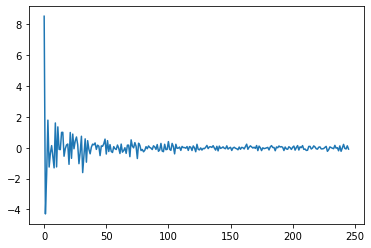

In [3]:
inputs = rawData['Open'].to_numpy()
N = len(rawData)
T = 24
series = np.linspace( 0, N / T, N )
y = dct(inputs, norm = 'ortho' )
plt.plot(y[3:])

In [4]:
print( y.min(), np.quantile(y, 0.25), y.mean(), np.quantile(y, 0.75), y.max() )

-14.422173535321972 -0.11567985684876769 0.9918605898088392 0.10724023260564199 255.20905762764002


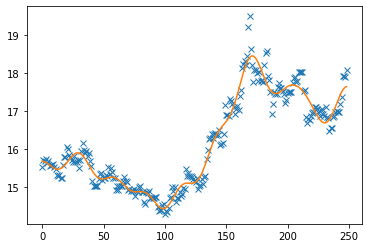

In [5]:
y1 = y
y1[20:] = 0
extracts = idct(y1, norm = "ortho")
plt.plot( inputs, "x" )
plt.plot( extracts)

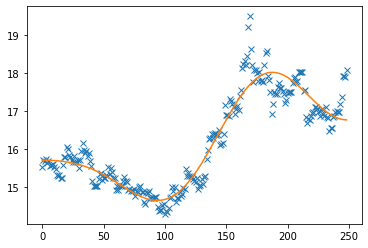

In [6]:
highFs = []
p = 0
for i in y:
    if np.abs(i) > np.quantile(y, 0.99):
        highFs.insert(p,i)
        p += 1
        # highFs.append(i)
    else:
        highFs.append(0)
extracts2 = idct(highFs, norm = "ortho")
plt.plot( inputs, "x" )
plt.plot( extracts2)

In [7]:
janData = pdr.DataReader("SI=F", 
                       start='2020-1-1', 
                       end='2020-1-31', 
                       data_source='yahoo')
janData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,17.999320,17.884440,17.932360,17.941120,19211.000000,17.941120
std,0.237388,0.215650,0.217858,0.219645,61023.601616,0.219645
min,17.450001,17.370001,17.450001,17.402000,0.000000,17.402000
25%,17.875000,17.760000,17.771000,17.860001,5.000000,17.860001
50%,18.000000,17.965000,17.969999,17.972000,50.000000,17.972000
75%,18.105000,18.020000,18.033001,18.068001,175.000000,18.068001
max,18.504999,18.215000,18.400000,18.316000,276360.000000,18.316000


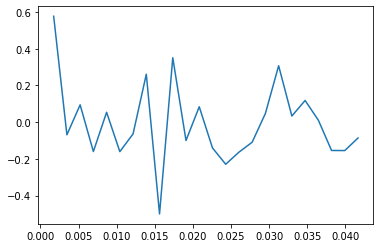

In [8]:
inputs2 = janData['Open'].to_numpy()
N2 = len(janData)
T2 = 24
series2 = np.linspace( 0,  1 /  T2 , N2 )
y2 = dct(inputs2, norm = 'ortho' )
plt.plot(series2[ 1 : ], y2[ 1 : ] )

In [9]:
print( y2.min(), np.quantile(y2, 0.25), y2.mean(), np.quantile(y2, 0.75), y2.max() )

-0.4994177489873688 -0.15408132701508026 3.580404080773869 0.09436002635905477 89.66180038452148


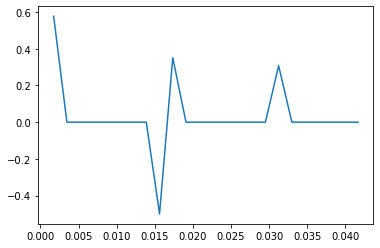

In [10]:
highFs1 = []
for i in y2:
    if np.abs(i) > np.quantile(y2, 0.85):
        highFs1.append(i)
    else:
        highFs1.append(0)
extracts3 = idct(highFs1, norm = "ortho")
plt.plot(series2[ 1 : ], highFs1[ 1 : ] )


(array([0.00173611, 0.00347222, 0.00520833, 0.00694444, 0.00868056,
       0.01041667, 0.01215278, 0.01388889, 0.015625  , 0.01736111,
       0.01909722, 0.02083333, 0.02256944, 0.02430556, 0.02604167,
       0.02777778, 0.02951389, 0.03125   , 0.03298611, 0.03472222,
       0.03645833, 0.03819444, 0.03993056, 0.04166667]), array([ 0.57652329,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.49941775,  0.35057198,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.30709258,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ]))


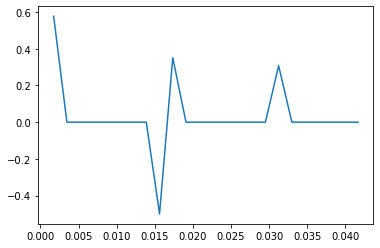

In [69]:
ax = plt.subplot(111)
li = ax.plot(series2[ 1 : ], highFs1[ 1 : ] )
print(li[0].get_data())

In [11]:
highFs1

[89.66180038452148,
 0.5765232855501484,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.4994177489873688,
 0.35057197864109557,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.30709258061178535,
 0,
 0,
 0,
 0,
 0,
 0]

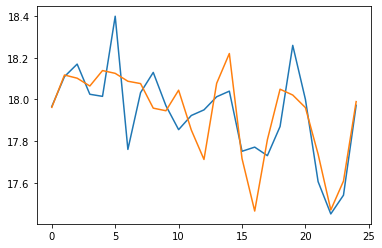

In [52]:
xf = np.linspace(0.0, N, 25)
plt.plot( inputs2 )
plt.plot( extracts3)


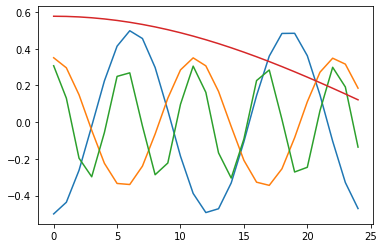

In [70]:
signal1 = -0.4994177489873688 * np.cos(np.pi * 0.015625 * xf) 
signal2 = 0.35057197864109557 * np.cos(np.pi * 0.01736111 * xf)
signal3 = 0.30709258061178535 * np.cos(np.pi * 0.03472222 * xf) 
signal4 = 0.5765232855501484 * np.cos(np.pi * 0.00173611 * xf)
plt.plot(signal1)
plt.plot(signal2)
plt.plot(signal3)
plt.plot(signal4)

Text(0, 0.5, 'Signal 4')

<Figure size 432x288 with 0 Axes>

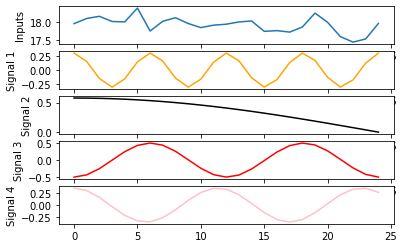

In [48]:
plt.figure()
f, axes = plt.subplots(5, 1)
axes[0].plot(inputs2)
axes[0].set_ylabel('Inputs')

axes[1].plot(0.30709258061178535 * np.cos(np.pi * 0.032 * xf), 'orange')
axes[1].set_ylabel('Signal 1')

axes[2].plot( 0.5765232855501484 * np.cos(np.pi * 0.002 * xf), 'black')
axes[2].set_ylabel('Signal 2')

axes[3].plot(-0.4994177489873688 * np.cos(np.pi * 0.016 * xf), 'red')
axes[3].set_ylabel('Signal 3')

axes[4].plot( 0.35057197864109557 * np.cos(np.pi * 0.017 * xf), 'pink')
axes[4].set_ylabel('Signal 4')

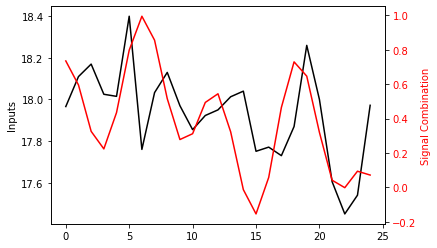

In [51]:
relevantSignal = signal1 + signal2 + signal3 + signal4
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(inputs2, 'black')
ax1.set_ylabel('Inputs')

ax2 = ax1.twinx()
ax2.plot(relevantSignal, 'r-')
ax2.set_ylabel('Signal Combination', color='r')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [16]:
febData = pdr.DataReader("SI=F", 
                       start='2020-2-1', 
                       end='2020-2-29', 
                       data_source='yahoo')
febData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000
mean,17.962739,17.823218,17.928392,17.914261,2.310194e+06,17.914261
std,0.392591,0.483037,0.358591,0.388432,1.098546e+07,0.388432
min,17.478001,16.340000,17.478001,17.478001,0.000000e+00,17.478001
25%,17.715000,17.600000,17.692500,17.649000,3.000000e+00,17.649000
50%,17.795000,17.715000,17.789000,17.757999,1.000000e+01,17.757999
75%,18.157001,18.138000,18.138000,18.157001,4.315000e+02,18.157001
max,18.868000,18.690001,18.690001,18.868000,5.270292e+07,18.868000


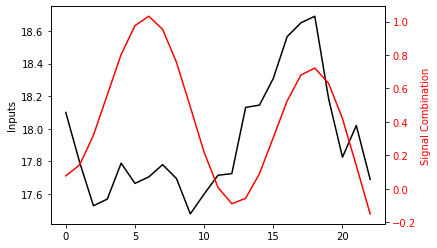

In [54]:
highFs2 = []
for i in y2:
    if np.abs(i) > np.quantile(y2, 0.8):
        highFs2.insert(p,i)
        p += 1
        # highFs.append(i)
    else:
        highFs2.append(0)
extracts3 = idct(highFs2, norm = "ortho")

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(febData['Open'].to_numpy(), 'black')
ax1.set_ylabel('Inputs')

ax2 = ax1.twinx()
ax2.plot(signal1[ : len(febData) ] +  signal4[ : len(febData) ], 'r-')
ax2.set_ylabel('Signal Combination', color='r')

for tl in ax2.get_yticklabels():
    tl.set_color('r')
